# Predicting the price of Avacados

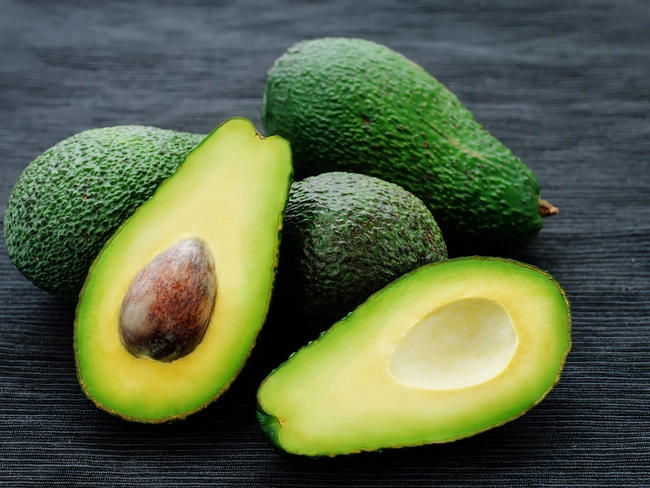

In [1]:
#display image using python
from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#importing the dataset
data = pd.read_csv(r'C:\Ds & AI ( my work)\Resume Project\Avocado_Price_Prediction\Dataset\avocado.csv',index_col=0)
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
data.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


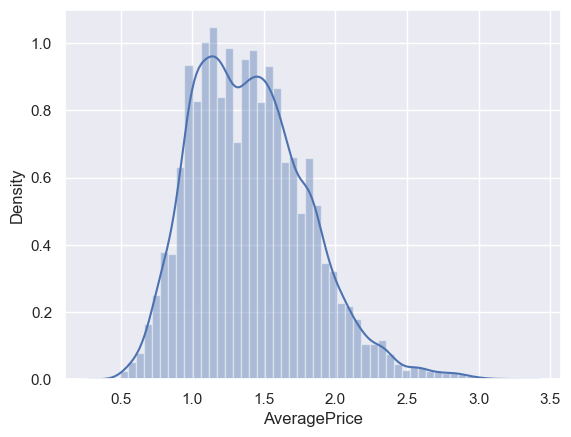

In [5]:
sns.distplot(data['AveragePrice']);

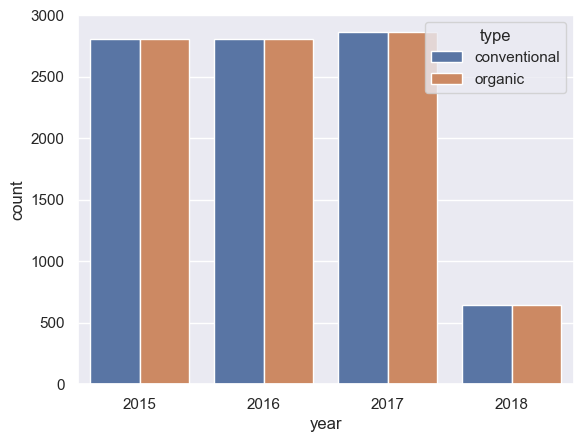

In [6]:
sns.countplot(x='year',data=data,hue='type');

In [7]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

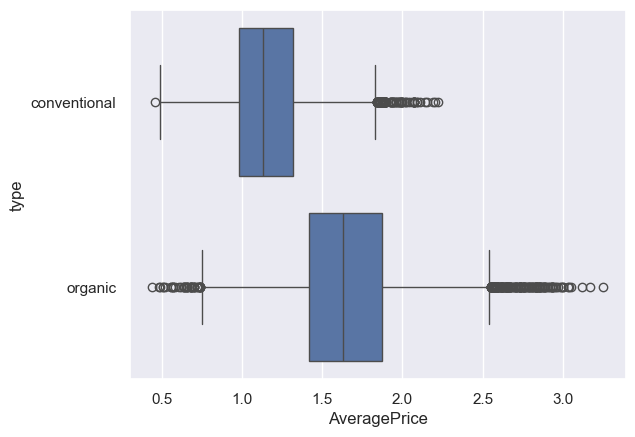

In [8]:
sns.boxplot(y="type", x="AveragePrice", data=data);

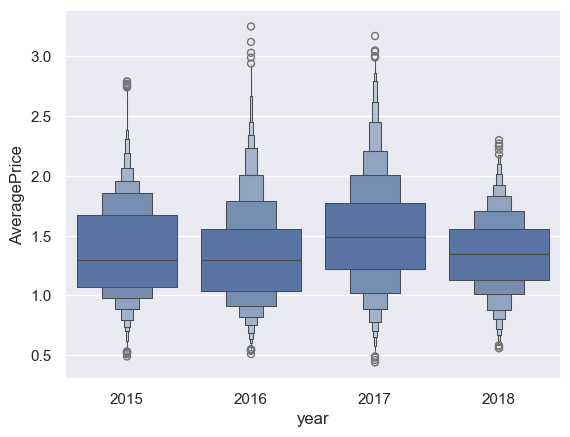

In [16]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

# Dealing with categorical features

In [17]:
print(data.columns)

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month'],
      dtype='object')


In [18]:
# Convert Month number to month name if needed
data['Month'] = data['Month'].map({
    1:'JAN', 2:'FEB', 3:'MARCH', 4:'APRIL', 5:'MAY', 
    6:'JUNE', 7:'JULY', 8:'AUG', 9:'SEPT', 
    10:'OCT', 11:'NOV', 12:'DEC'
})


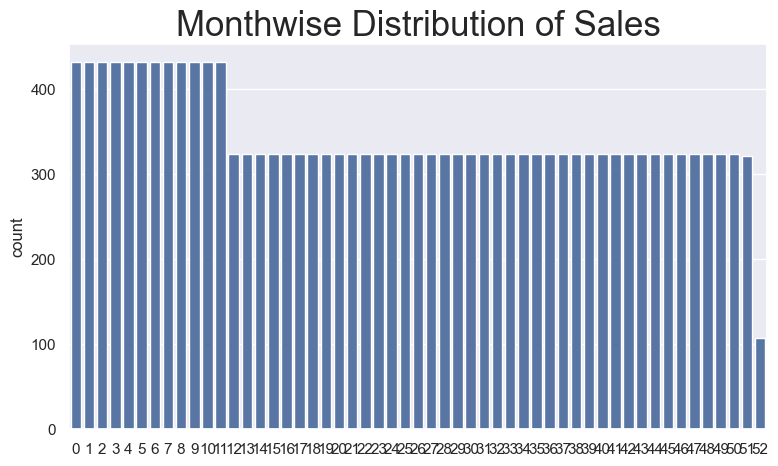

In [19]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

# Preparing data for ML models

In [20]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [22]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 4.2 MB/s eta 0:00:14
    --------------------------------------- 1.3/56.8 MB 4.2 MB/s eta 0:00:14
   - -------------------------------------- 2.4/56.8 MB 4.5 MB/s eta 0:00:13
   -- ------------------------------------- 3.1/56.8 MB 4.2 MB/s eta 0:00:13
   --- ------------------------------------ 4.5/56.8 MB 4.8 MB/s eta 0:00:11
   ---- ----------------------------------- 5.8/56.8 MB 4.9 MB/s eta 0:00:11
   ----- ---------------------------------- 7.3/56.8 MB 5.3 MB/s eta 0:00:10
   ------ --------------------------------- 8.9/56.8 MB 5.6 MB/s eta 0:00:09
   ------- -------------------------------- 10.2/56.8 MB 5.7 MB/s eta 0:00:09
   ------- -------------------------------- 11.0/56.8 MB 5.5 MB/s eta 0:00:09
   -------- ------------------------------- 11.5/56.8 MB 5.2 MB/s eta 0:00:09
  

In [23]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
    regressors = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'XGB': XGBRegressor()
}
                 

In [30]:
results = pd.DataFrame(columns=['MAE', 'MSE', 'R2-score'])

for method, model in regressors.items():
    model.fit(X_train, y_train)   # fit the model
    pred = model.predict(X_test)  # predictions
    
    results.loc[method] = [
        np.round(mean_absolute_error(y_test, pred), 3),
        np.round(mean_squared_error(y_test, pred), 3),
        np.round(r2_score(y_test, pred), 3)
    ]



ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Deep Neural Network

In [32]:
pip install tensorflow 

Defaulting to user installation because normal site-packages is not writeable
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.9 MB 3.4 MB/s eta 0:01:39
   ---------------------------------------- 1.3/331.9 MB 2.4 MB/s eta 0:02:18
   ---------------------------------------- 1.8/331.9 MB 2.3 MB/s eta 0:02:22
   ---------------------------------------- 2.6/331.9 MB 2.7 MB/s eta 0:02:00
   ---------------------------------------- 3.9/331.9 MB 3.3 MB/s eta 0:01:40
    --------------------------------------- 5.2/331.9 MB 3.8 MB/s eta 0:01:27
    --------------------------------------- 6.3/331.9 MB 4.0 MB/s eta 0:01:22
    ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [36]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [38]:
# Convert to float32
X_train = X_train.astype('float32')
X_val   = X_val.astype('float32')
y_train = y_train.astype('float32')
y_val   = y_val.astype('float32')

# Then fit
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=100,
    epochs=150,
    callbacks=[early_stop]
)


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.4685 - val_loss: 0.1649
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2228 - val_loss: 0.1648
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2084 - val_loss: 0.1612
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2077 - val_loss: 0.1711
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2028 - val_loss: 0.1646
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1966 - val_loss: 0.1743
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1937 - val_loss: 0.1621
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1884 - val_loss: 0.1664
Epoch 9/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1911 - val_loss: 0.1613
Epoch 10/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1911 - val_loss: 0.1621
Epoch 11/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1870 - val_loss: 0.1778
Epoch 12/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

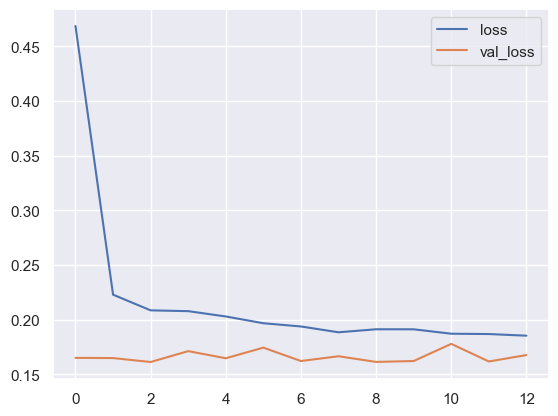

In [39]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [40]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Result Table

In [60]:
print("Regressors in dictionary:", list(regressors.keys()))


Regressors in dictionary: ['LinearRegression', 'DecisionTree', 'RandomForest', 'SVR', 'KNN', 'XGB']


In [65]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machines': SVR(),
    'K-nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}



In [66]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [67]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGB,0.128000,0.032000,0.807000
RandomForest,0.130000,0.033000,0.797000
DecisionTree,0.170000,0.064000,0.611000
Deep Neural Network,0.328000,0.171000,-0.047000
